In [6]:
!pip uninstall python-binance

^C


In [7]:
!pip install python-binance

In [11]:
from binance import Client,ThreadedWebsocketManager,ThreadedDepthCacheManager
import pandas as pd
from keys import apiKey, secret

## **Nos autenticamos como clientes**

In [7]:
client= Client(apiKey,secret)

In [8]:
tickers = client.get_all_tickers()

In [9]:
df = pd.DataFrame(tickers)

In [12]:
# Seteamos index con campo simbolo
df.set_index("symbol",inplace=True)

In [14]:
df.loc['BTCUSDT']

price    21574.58000000
Name: BTCUSDT, dtype: object

## Get Depth

In [141]:
#DEPTH

depth= client.get_order_book(symbol="BTCUSDT")

In [142]:
depth

{'lastUpdateId': 21554353144,
 'bids': [['21162.83000000', '0.08039000'],
  ['21162.82000000', '0.00945000'],
  ['21162.80000000', '0.00945000'],
  ['21162.75000000', '0.00999000'],
  ['21162.69000000', '0.00106000'],
  ['21162.68000000', '0.01000000'],
  ['21162.66000000', '0.01999000'],
  ['21162.61000000', '0.00520000'],
  ['21162.56000000', '0.02384000'],
  ['21162.55000000', '0.03000000'],
  ['21162.29000000', '0.00100000'],
  ['21162.21000000', '0.01227000'],
  ['21162.20000000', '0.02457000'],
  ['21162.19000000', '0.07090000'],
  ['21162.05000000', '0.01230000'],
  ['21161.95000000', '0.00053000'],
  ['21161.84000000', '0.04362000'],
  ['21161.62000000', '0.21355000'],
  ['21161.59000000', '0.01000000'],
  ['21161.39000000', '0.10000000'],
  ['21161.29000000', '0.00100000'],
  ['21161.00000000', '0.00091000'],
  ['21160.97000000', '0.00549000'],
  ['21160.92000000', '0.01560000'],
  ['21160.83000000', '0.01418000'],
  ['21160.80000000', '0.00617000'],
  ['21160.77000000', '0.00

In [143]:
df_bid = pd.DataFrame(depth["bids"]) # o asks
df_bid.columns=["Price","Volume"]

In [133]:
df_bid.head()

,Price,Volume
0,21038.66000000,0.03783000
1,21038.64000000,0.00226000
2,21038.34000000,0.00094000
3,21038.19000000,0.00237000
4,21038.18000000,0.20577000


## Get Historial Data

In [30]:
[
    [
        #open time
        #open
        #high
        #low
        #close
        #volume
        #close time
        #quote asset volume
        #number of trades
        #taker buy base asset volume
        #taker buy quote asset volume
        #ignore
    ]]

[[]]

In [31]:
client.get_historical_klines??

Signature:
client.get_historical_klines(
    symbol,
    interval,
    start_str=None,
    end_str=None,
    limit=1000,
    klines_type: binance.enums.HistoricalKlinesType = <HistoricalKlinesType.SPOT: 1>,
)
Source:   
    def get_historical_klines(self, symbol, interval, start_str=None, end_str=None, limit=1000,
                              klines_type: HistoricalKlinesType = HistoricalKlinesType.SPOT):
        """Get Historical Klines from Binance

        :param symbol: Name of symbol pair e.g BNBBTC
        :type symbol: str
        :param interval: Binance Kline interval
        :type interval: str
        :param start_str: optional - start date string in UTC format or timestamp in milliseconds
        :type start_str: str|int
        :param end_str: optional - end date string in UTC format or timestamp in milliseconds (default will fetch everything up to now)
        :type end_str: str|int
        :param limit: Default 1000; max 1000.
        :type limit: int
        :param kli

In [57]:
historical = client.get_historical_klines("BTCUSDT",Client.KLINE_INTERVAL_1DAY,"1 jAN 2021")

In [58]:
historical

[[1609459200000,
  '28923.63000000',
  '29600.00000000',
  '28624.57000000',
  '29331.69000000',
  '54182.92501100',
  1609545599999,
  '1582526989.16187265',
  1314910,
  '27455.80172500',
  '802247744.54510409',
  '0'],
 [1609545600000,
  '29331.70000000',
  '33300.00000000',
  '28946.53000000',
  '32178.33000000',
  '129993.87336200',
  1609631999999,
  '4073842163.67154117',
  2245922,
  '67446.30524600',
  '2110334723.88714587',
  '0'],
 [1609632000000,
  '32176.45000000',
  '34778.11000000',
  '31962.99000000',
  '33000.05000000',
  '120957.56675000',
  1609718399999,
  '4057598425.49201649',
  2369698,
  '59750.33287100',
  '2004428433.93184622',
  '0'],
 [1609718400000,
  '33000.05000000',
  '33600.00000000',
  '28130.00000000',
  '31988.71000000',
  '140899.88569000',
  1609804799999,
  '4429010349.69534487',
  2642408,
  '69088.46923000',
  '2173435409.01698791',
  '0'],
 [1609804800000,
  '31989.75000000',
  '34360.00000000',
  '29900.00000000',
  '33949.53000000',
  '116049

In [59]:
hist_df = pd.DataFrame(historical)

In [60]:
hist_df.columns=[
        "open_time",
        "open",
        "high",
        "low",
        "close",
        "volume",
        "close_time",
        "quote_asset_volume",
        "number_of_trades",
        "taker_buy_base_asset_volume",
        "taker_buy_quote_asset_volume",
        "ignore"]

In [42]:
hist_df.shape

(571, 12)

In [43]:
hist_df.dtypes 

open_time                        int64
open                            object
high                            object
low                             object
close                           object
volume                          object
close_time                       int64
quote_asset_volume              object
number_of_trades                 int64
taker_buy_base_asset_volume     object
taker_buy_quote_asset_volume    object
ignore                          object
dtype: object

## Preprocesss historial data

Convertimos campos con tiempo a tipo fecha

In [62]:
hist_df["open_time"]= pd.to_datetime(hist_df["open_time"]/1000,unit="s")
hist_df["close_time"]= pd.to_datetime(hist_df["close_time"]/1000,unit="s")

Convertir string con números a tipo numerico

In [65]:
numeric_columns= ["open",
        "high",
        "low",
        "close",
        "volume",
        "quote_asset_volume",
        "taker_buy_base_asset_volume",
        "taker_buy_quote_asset_volume"]


In [68]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [70]:
hist_df.dtypes

open_time                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
close_time                      datetime64[ns]
quote_asset_volume                     float64
number_of_trades                         int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
ignore                                  object
dtype: object

## VIZ

In [71]:
import mplfinance as mpf

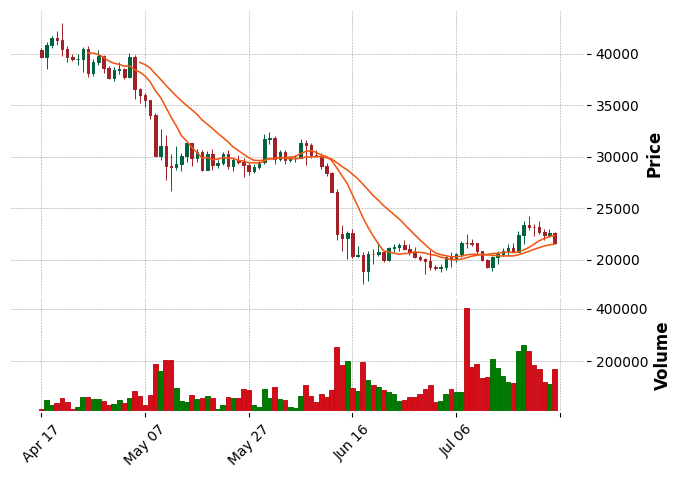

In [79]:
mpf.plot(hist_df.set_index("close_time").tail(100),
        type="candle",
         style="charles",
        volume=True,
        mav=(10,20))